In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns

pd.options.display.float_format = '{:.2f}'.format
plt.rcParams['figure.figsize'] = (16, 8)

Для начала прочитаем только заголовки датасета:

In [2]:
headers = pd.read_csv('Массив чеков_ver2.csv', nrows=0, encoding='utf-16').columns.tolist()
headers

['region',
 'userInn',
 'client_NT',
 'text_kktAddress',
 'Идентификатор покупателя',
 'dateTime',
 'Year',
 'Month',
 'receipt_id',
 'CLEAN_SKU',
 'price_items',
 'quantity_items',
 'sum_items',
 'totalSum',
 'RIGHTHOLDER_NT',
 'BRAND_NT',
 'CLASS_NT',
 'GROUP_NT',
 'CATEGORY_NT',
 'SUBCATEGORY_NT',
 'BASE_NT',
 'lat',
 'lon']

Можно сформировать отдельный список всех магазинов из датасета:

In [18]:
# Сформируем список магазинов из csv-файла, прочитав только колонки 'client_NT', 'text_kktAddress', 'lat', 'lon'
stores = pd.read_csv('Массив чеков_ver2.csv', usecols=['client_NT', 'text_kktAddress', 'lat', 'lon'], encoding='utf-16').drop_duplicates()
stores

,client_NT,text_kktAddress,lat,lon
0,Ашан,"г Москва, ул Ярцевская, д 19","55,7386329","37,4111005"
10,Окей,"г Москва, ул Озёрная, д 50","55,6647196","37,4372193"
31,Ашан,"г Москва, ш Бесединское, влд 15","55,625156","37,7611029"
52,Лента,"г Москва, ш Ярославское, д 54","55,8654562","37,7047982"
53,Ашан,"г Москва, пр-кт Рязанский, д 2 к 2","55,729868","37,730437"
...,...,...,...,...
11459803,Окей,"г Москва, ш Дмитровское, д 58А","55,8515572","37,5663772"
11462486,Окей,"г Москва, ш Дмитровское, влд 91А","55,870203","37,546893"
12469804,Окей,"г Москва, ш Дмитровское, д 41","55,833526","37,570788"
12580828,Окей,"г Москва, ш Дмитровское, д 107 стр 2а","55,878406","37,5413905"


И отдельный список торговых сетей:

In [19]:
trades = stores['client_NT'].drop_duplicates()
trades

0             Ашан
10            Окей
52           Лента
88     Гиперглобус
104      Metro c&c
Name: client_NT, dtype: object

In [5]:
# Сохраним результат в csv файл
stores.sort_values(['client_NT', 'text_kktAddress']).to_csv('Список магазинов.csv', index=False, encoding='utf-8')

Переопределим некоторые типы данных для экономии места:

In [3]:
dtype_spec = {
    'region': 'category',
    'userInn': 'int64',
    'client_NT': 'category',
    'text_kktAddress': 'category',
    'Идентификатор покупателя': 'str',
    'dateTime': 'str', # после преобразуем в datetime
    'Year': 'int16',
    'Month': 'int16',
    'receipt_id': 'str',
    'CLEAN_SKU': 'str',
    'price_items': 'float32',
    'quantity_items': 'float32',
    'sum_items': 'float32',
    'totalSum': 'float32',
    'RIGHTHOLDER_NT': 'str',
    'BRAND_NT': 'category',
    'CLASS_NT': 'category',
    'GROUP_NT': 'category',
    'CATEGORY_NT': 'category',
    'SUBCATEGORY_NT': 'category',
    'BASE_NT': 'category',
    'lat': 'float32',
    'lon': 'float32'
}

Загружаем датасет:

In [4]:
data = pd.read_csv('Массив чеков_ver2.csv', encoding='utf-16', dtype=dtype_spec, decimal=',').drop_duplicates().reset_index()

Если появляется ошибка памяти, то можно загрузить датасет частями:

In [ ]:
data = pd.DataFrame()
chunk_size = 1000000
for chunk in pd.read_csv('Массив чеков_ver2.csv', encoding='utf-16', dtype=dtype_spec, decimal=',', chunksize=chunk_size):
    data = pd.concat([data, chunk], ignore_index=True)
data  = data.drop_duplicates().reset_index()

Посмотрим первые 5 строк, чтобы убедиться, что всё подгрузилось правильно:

In [8]:
data.head(5)

,region,userInn,client_NT,text_kktAddress,Идентификатор покупателя,dateTime,Year,Month,receipt_id,CLEAN_SKU,...,totalSum,RIGHTHOLDER_NT,BRAND_NT,CLASS_NT,GROUP_NT,CATEGORY_NT,SUBCATEGORY_NT,BASE_NT,lat,lon
0,МОСКВА,7703270067,Ашан,"г Москва, ул Ярцевская, д 19",NaN,26.06.2022 11:31:00,2022,6,9960440300568774:126056,РИЕТ ПУТИНА КРАБ 100,...,3038.850098,ПУТИНА,ПУТИНА,БАКЛ,КОНСЕРВЫ МЯСНЫЕ,ПАШТЕТ КОНСЕРВИРОВАННЫЙ,ПАШТЕТ ИЗ МЯСА,РИЕТ ИЗ МЯСА,55.738632,37.411102
2,МОСКВА,7703270067,Ашан,"г Москва, ул Ярцевская, д 19",NaN,26.06.2022 11:31:00,2022,6,9960440300568774:126056,КРЕПЫШ КЕФИР 200Г,...,3038.850098,РОСТАГРОЭКСПОРТ,КРЕПЫШ,МЛДП,МОЛОЧНОЕ ДЕТСКОЕ ПИТАНИЕ,КИСЛОМОЛОЧНЫЙ ПРОДУКТ ДЛЯ ДЕТЕЙ,КЕФИР ДЕТ,КЕФИР ДЕТ,55.738632,37.411102
6,МОСКВА,7703270067,Ашан,"г Москва, ул Ярцевская, д 19",NaN,27.06.2022 8:29:00,2022,6,9960440300639223:72624,СВЯТОЙ ИСТОЧНИК 1Л ГАЗ,...,1149.569946,не определено,СВЯТОЙ ИСТОЧНИК,NaN,NaN,NaN,NaN,NaN,55.738632,37.411102
7,МОСКВА,7703270067,Ашан,"г Москва, ул Ярцевская, д 19",NaN,27.06.2022 8:29:00,2022,6,9960440300639223:72624,КД/ЖЕЛЕ ЯБЛОКО 150Г,...,1149.569946,NO NAME-СТМ,КАЖДЫЙ ДЕНЬ,МЛДП,МОЛОЧНАЯ ПРОДУКЦИЯ,ДЕСЕРТ,КРЕМ-ЖЕЛЕ,ЖЕЛЕ,55.738632,37.411102
8,МОСКВА,7703270067,Ашан,"г Москва, ул Ярцевская, д 19",NaN,27.06.2022 8:29:00,2022,6,9960440300639223:72624,КД/ЖЕЛЕ ВИШНЯ 150Г,...,1149.569946,NO NAME-СТМ,КАЖДЫЙ ДЕНЬ,МЛДП,МОЛОЧНАЯ ПРОДУКЦИЯ,ДЕСЕРТ,КРЕМ-ЖЕЛЕ,ЖЕЛЕ,55.738632,37.411102


Посмотрим общую информацию о датафрейме:

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11954889 entries, 0 to 11954888
Data columns (total 24 columns):
 #   Column                    Dtype   
---  ------                    -----   
 0   index                     int64   
 1   region                    category
 2   userInn                   int64   
 3   client_NT                 category
 4   text_kktAddress           object  
 5   Идентификатор покупателя  object  
 6   dateTime                  object  
 7   Year                      int16   
 8   Month                     int16   
 9   receipt_id                object  
 10  CLEAN_SKU                 object  
 11  price_items               float32 
 12  quantity_items            float32 
 13  sum_items                 float32 
 14  totalSum                  float32 
 15  RIGHTHOLDER_NT            object  
 16  BRAND_NT                  object  
 17  CLASS_NT                  category
 18  GROUP_NT                  object  
 19  CATEGORY_NT               object  
 20  

Посмотрим описательные статистики для числовых столбцов:

In [31]:
data.describe()

,index,userInn,Year,Month,price_items,quantity_items,sum_items,totalSum,lat,lon,hour,weekday
count,11954889.00,11954889.00,11954889.00,11954889.00,11954889.00,11954889.00,11954889.00,11954889.00,11954889.00,11954889.00,11954889.00,11954889.00
mean,6271068.63,7732818245.66,2022.00,5.95,159.04,1.53,183.40,4504.88,55.72,37.57,14.19,3.28
std,3634719.97,44401311.45,0.00,0.83,221.40,2.86,321.20,3482.16,0.09,0.13,3.97,2.01
min,0.00,7703270067.00,2022.00,5.00,0.00,0.00,0.00,0.00,55.52,37.30,0.00,0.00
25%,3135172.00,7703270067.00,2022.00,5.00,58.99,1.00,67.99,2336.32,55.64,37.49,11.00,2.00
50%,6238652.00,7703270067.00,2022.00,6.00,99.90,1.00,118.78,3738.68,55.71,37.60,14.00,4.00
75%,9408835.00,7743543761.00,2022.00,7.00,181.99,1.02,209.39,5610.40,55.79,37.67,17.00,5.00
max,12595771.00,7826087713.00,2022.00,7.00,59990.00,2000.00,222146.09,286771.72,55.93,37.88,23.00,6.00


Посмотрим корреляционные отношения между числовыми столбцами

<Axes: >

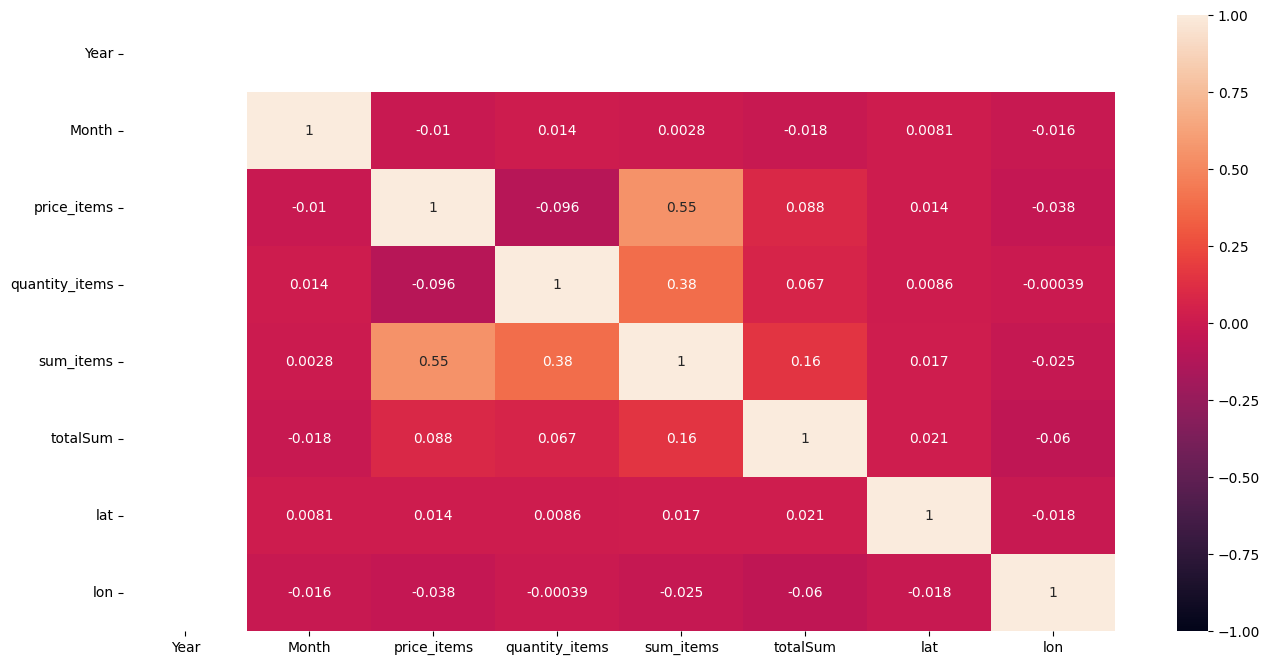

In [ ]:
corr = data[['Year', 'Month', 'price_items', 'quantity_items', 'sum_items', 'totalSum', 'lat', 'lon']]
sns.heatmap(corr.corr(), vmax=1, vmin=-1, annot=True)

Практически везде слабая корреляционная зависимость, за исключением средней корреляционной зависимости sum_items - price_items

Добавим новые столбцы hour и weekday. И переименуем столбец "Идентификатор покупателя" в customer_id

In [14]:
data['hour'] = pd.to_datetime(data.dateTime).dt.hour

weekdays = {
    0: '1.Понедельник',
    1: '2.Вторник',
    2: '3.Среда',
    3: '4.Четверг',
    4: '5.Пятница',
    5: '6.Суббота',
    6: '7.Воскресенье'
    }
data['weekday'] = pd.to_datetime(data.dateTime).dt.weekday.map(weekdays)

data = data.rename(columns={'Идентификатор покупателя': 'customer_id'})

C:\Temp\ipykernel_19692\2744415287.py:1: UserWarning: Parsing dates in %d.%m.%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['hour'] = pd.to_datetime(data.dateTime).dt.hour
C:\Temp\ipykernel_19692\2744415287.py:12: UserWarning: Parsing dates in %d.%m.%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['weekday'] = pd.to_datetime(data.dateTime).dt.weekday.map(weekdays)


Сформируем таблицу со средним чеком по часам во всех торговых сетях для сравнения:

In [48]:
data.pivot_table(values='sum_items', index=['hour'], columns=['client_NT'], aggfunc='mean', observed=False)

client_NT,Metro c&c,Ашан,Гиперглобус,Лента,Окей
hour,,,,,
0,310.40,128.06,166.03,159.41,168.78
1,1004.00,NaN,205.25,162.86,NaN
2,953.42,NaN,202.78,141.83,NaN
3,NaN,NaN,199.17,105.23,NaN
4,NaN,NaN,221.22,135.49,NaN
5,278.23,237.39,205.22,132.59,NaN
6,443.98,216.40,197.81,159.77,NaN
7,432.76,204.85,203.41,166.61,NaN
8,439.01,205.87,204.46,166.29,143.34


Аналогично сформируем таблицу со средним чеком по дням недели во всех торговых сетях для сравнения:

In [ ]:
data.pivot_table(values='sum_items', index=['weekday'], columns=['client_NT'], aggfunc='mean', observed=False)

client_NT,Metro c&c,Ашан,Гиперглобус,Лента,Окей
weekday,,,,,
1.Понедельник,433.67,189.19,203.45,154.89,138.73
2.Вторник,407.98,190.32,202.92,154.08,137.67
3.Среда,421.14,192.88,207.36,167.48,139.08
4.Четверг,468.90,192.35,206.27,160.60,145.10
5.Пятница,377.81,187.96,205.30,156.85,143.77
6.Суббота,324.25,179.63,195.30,152.61,142.54
7.Воскресенье,294.36,178.52,194.16,151.79,139.71


In [10]:
def average_bill_network(data: pd.DataFrame) -> float:
    ...